In [1]:
from my_functions import *
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
x, y = load_data("data/student-mat.csv")
x


,school,sex,age,Mjob,Fjob,higher,activities,G1,G2
0,GP,F,18,at_home,teacher,yes,no,5,6
1,GP,F,17,at_home,other,yes,no,5,5
2,GP,F,15,at_home,other,yes,no,7,8
3,GP,F,15,health,services,yes,yes,15,14
4,GP,F,16,other,other,yes,no,6,10
...,...,...,...,...,...,...,...,...,...
390,MS,M,20,services,services,yes,no,9,9
391,MS,M,17,services,services,yes,no,14,16
392,MS,M,21,other,other,yes,no,10,8
393,MS,M,18,services,other,yes,no,11,12


In [3]:
x_dummy = dummy_matrices(x)
x_dummy

C:\Users\Admin\Desktop\Project\my_functions.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_num[column] = non_num[column].apply(lambda x: column[0].lower() + "_" + x)


,school,sex,age,higher,activities,G1,G2,m_at_home,m_health,m_other,m_services,m_teacher,f_at_home,f_health,f_other,f_services,f_teacher
0,0,0,18,1,0,5,6,1,0,0,0,0,0,0,0,0,1
1,0,0,17,1,0,5,5,1,0,0,0,0,0,0,1,0,0
2,0,0,15,1,0,7,8,1,0,0,0,0,0,0,1,0,0
3,0,0,15,1,1,15,14,0,1,0,0,0,0,0,0,1,0
4,0,0,16,1,0,6,10,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,0,9,9,0,0,0,1,0,0,0,0,1,0
391,1,1,17,1,0,14,16,0,0,0,1,0,0,0,0,1,0
392,1,1,21,1,0,10,8,0,0,1,0,0,0,0,1,0,0
393,1,1,18,1,0,11,12,0,0,0,1,0,0,0,1,0,0


In [22]:
x_dummy_np = pd_to_np(x_dummy)

y_np = pd_to_np(y)


In [23]:
x_dummy_np

array([[ 0.,  0., 18., ...,  0.,  0.,  1.],
       [ 0.,  0., 17., ...,  1.,  0.,  0.],
       [ 0.,  0., 15., ...,  1.,  0.,  0.],
       ...,
       [ 1.,  1., 21., ...,  1.,  0.,  0.],
       [ 1.,  1., 18., ...,  1.,  0.,  0.],
       [ 1.,  1., 19., ...,  0.,  0.,  0.]])

In [24]:
x_dummy_np_norm = normalize(x_dummy_np)
x_dummy_np_norm

array([[0.        , 0.        , 0.81818182, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.77272727, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.68181818, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.95454545, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.81818182, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.86363636, ..., 0.        , 0.        ,
        0.        ]])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_dummy_np, y_np, train_size=0.7)
len(x_train)/len(x_dummy_np)

0.6987341772151898

In [26]:
w_pred, b_pred, r_sq = compute_model(x_train, y_train)
print(w_pred, "\n", "\n",  b_pred, "\n", "\n", r_sq)

[ 0.14948868  0.16113688 -0.24925834 -0.22659873 -0.37779211  0.14009302
  0.9832648  -0.09452782 -0.13928077  0.06480148  0.10013181  0.0688753
 -0.24709821  0.38616645  0.09098654 -0.37965217  0.14959739] 
 
 2.8150951896503287 
 
 0.8221378660758835


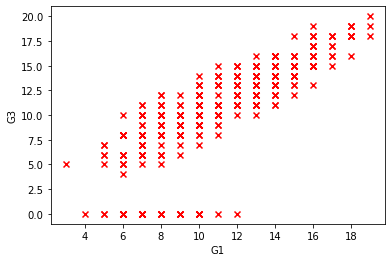

In [32]:
plt.scatter(x_dummy_np[:,5], y, c = "r", marker = "x")
plt.ylabel("G3")
plt.xlabel("G1")
plt.show()

In [31]:
m = x_dummy_np.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = np.dot(w_pred, x_dummy_np[i]) + b_pred

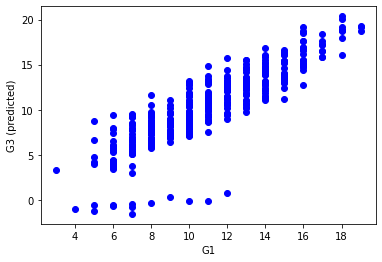

In [36]:
plt.scatter(x["G1"], predicted, c = "b")
plt.ylabel("G3 (predicted)")
plt.xlabel("G1")
plt.show()

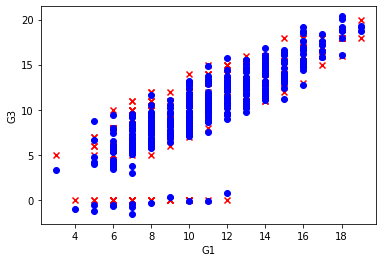

In [35]:
plt.scatter(x_dummy_np[:,5], y, c = "r", marker = "x")
plt.scatter(x_dummy_np[:,5], predicted, c = "b")
plt.ylabel("G3")
plt.xlabel("G1")
plt.show()